This is an example of using beautiful soup with pandas to do web scraping, we will be fetching information from </br>
https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/ </br>
https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5733226#overview </br>
The library/package to make sure you installed is:  pip install html5lib 



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
%matplotlib inline

In [24]:
FailedBankData = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')

In [25]:
type(FailedBankData)

list

In [26]:
FailedBankData[0].head()

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534


In [27]:
#cert is the amount of certifcate of deposits, Fund is the pool of money
FailedBankData[0]

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534
...,...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646


In [28]:
FailedBankData[0]['Bank NameBank'].count()

563

In [29]:
FailedBankData[0].columns

Index(['Bank NameBank', 'CityCity', 'StateSt', 'CertCert',
       'Acquiring InstitutionAI', 'Closing DateClosing', 'FundFund'],
      dtype='object')

In [30]:
#by nationality
byAquringInst = FailedBankData[0].groupby('Acquiring InstitutionAI')

In [31]:
byAquringInst.mean()

,CertCert,FundFund
Acquiring InstitutionAI,,
1st United Bank,33141.0,10296.666667
Advantage National Bank Group,34292.0,10350.000000
"Alerus Financial, N.A.",34588.5,10112.000000
Allegheny Valley Bank of Pittsburgh,35353.0,10000.000000
Alma Bank,35527.0,10433.000000
...,...,...
Whidbey Island Bank,28287.0,10253.000000
Whitney Bank,58302.0,10526.000000
Wilshire State Bank,57332.0,10072.000000


In [32]:
FailedBankData[0].sort_values('Bank NameBank')

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
355,1st American State Bank of Minnesota,Hancock,MN,15448,"Community Development Bank, FSB","February 5, 2010",10183
508,1st Centennial Bank,Redlands,CA,33025,First California Bank,"January 23, 2009",10030
56,1st Commerce Bank,North Las Vegas,NV,58358,Plaza Bank,"June 6, 2013",10482
303,1st Pacific Bank of California,San Diego,CA,35517,City National Bank,"May 7, 2010",10232
69,1st Regents Bank,Andover,MN,57157,First Minnesota Bank,"January 18, 2013",10469
...,...,...,...,...,...,...,...
478,Westsound Bank,Bremerton,WA,34843,Kitsap Bank,"May 8, 2009",10060
314,Wheatland Bank,Naperville,IL,58429,Wheaton Bank & Trust,"April 23, 2010",10224
272,Williamsburg First National Bank,Kingstree,SC,17837,"First Citizens Bank and Trust Company, Inc.","July 23, 2010",10270
280,Woodlands Bank,Bluffton,SC,32571,Bank of the Ozarks,"July 16, 2010",10262


In [49]:
#top 10 banks with certs above 50,000
top10Certs = FailedBankData[0][FailedBankData[0]['CertCert'] > 50000].head(10)

In [50]:
top10Certs

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
5,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019",10533
6,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019",10532
12,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017",10526
24,Edgebrook Bank,Chicago,IL,57772,Republic Bank of Chicago,"May 8, 2015",10514
34,Eastside Commercial Bank,Conyers,GA,58125,Community & Southern Bank,"July 18, 2014",10504
40,AztecAmerica Bank En Español,Berwyn,IL,57866,Republic Bank of Chicago,"May 16, 2014",10498
42,Vantage Point Bank,Horsham,PA,58531,First Choice Bank,"February 28, 2014",10496
47,"Texas Community Bank, National Association",The Woodlands,TX,57431,"Spirit of Texas Bank, SSB","December 13, 2013",10491
50,The Community's Bank,Bridgeport,CT,57041,No Acquirer,"September 13, 2013",10489
56,1st Commerce Bank,North Las Vegas,NV,58358,Plaza Bank,"June 6, 2013",10482


In [51]:
FailedBankData[0][FailedBankData[0]['Bank NameBank']=='Williamsburg First National Bank']

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
272,Williamsburg First National Bank,Kingstree,SC,17837,"First Citizens Bank and Trust Company, Inc.","July 23, 2010",10270


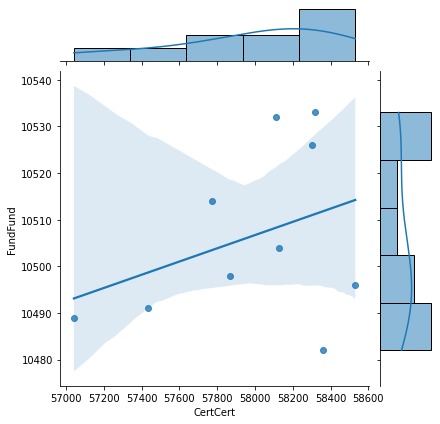

In [53]:
sns.jointplot(x='CertCert',y='FundFund',data=top10Certs,kind="reg")

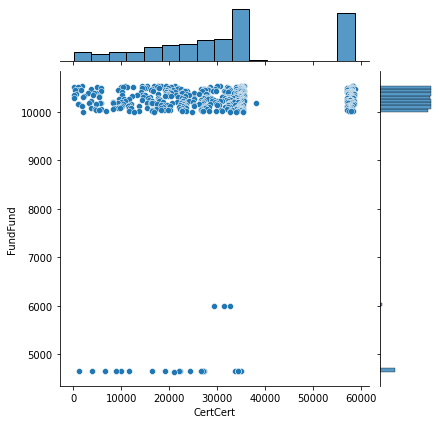

In [35]:
#cert is the amount of certifcate of deposits, Fund is the pool of money
sns.jointplot(x='CertCert',y='FundFund',data=FailedBankData[0])

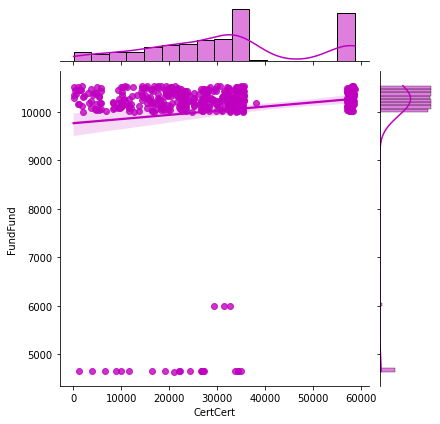

In [37]:
sns.jointplot(x='CertCert',y='FundFund',data=FailedBankData[0],color="m",kind="reg")